# Polyalphabetische Chiffren
(Vigenère Chiffre)

Bereits im 9. Jahrhundert wurde im islamischen Raum die grosse Schwachstelle
monoalphabetischer Chiffren (Caesar-Chiffre) erkannt. Die Verteilung der
Buchstaben folgt in jeder Sprache einem spezifischen aber konstanten Muster. Für
die deutsche Sprache ist die Verteilung der folgenden Tabelle zu entnehmen.

| Buchstabe | relative Häufigkeit | Buchstabe | relative Häufigkeit | Buchstabe | relative Häufigkeit |
| --- | --- | --- | --- | --- | --- | 
| a | 0.0651 | l | 0.0344 | w | 0.0189 |
| b | 0.0189 | m | 0.0253 | x | 0.0003 |
| c | 0.0306 | n | 0.0978 | y | 0.0004 |
| d | 0.0508 | o | 0.0251 | z | 0.0113 |
| e | 0.1740 | p | 0.0079 | |
| f | 0.0166 | q | 0.0002 | |
| g | 0.0301 | r | 0.0700 | |
| h | 0.0476 | s | 0.0727 | |
| i | 0.0755 | t | 0.0615 | |
| j | 0.0027 | u | 0.0435 | |
| k | 0.0121 | v | 0.0067 | |

Um zu zeigen, dass dies sich mit (längeren) Texten deckt, wurde ein Kapitel aus
dem Roman 'Der Zauberberg' von Thomas Mann ausgewertet. Die sich
aus dieser Auswertung ergebende Verteilung wird in der folgenden Grafik der
Verteilung aus der Tabelle gegenübergestellt.

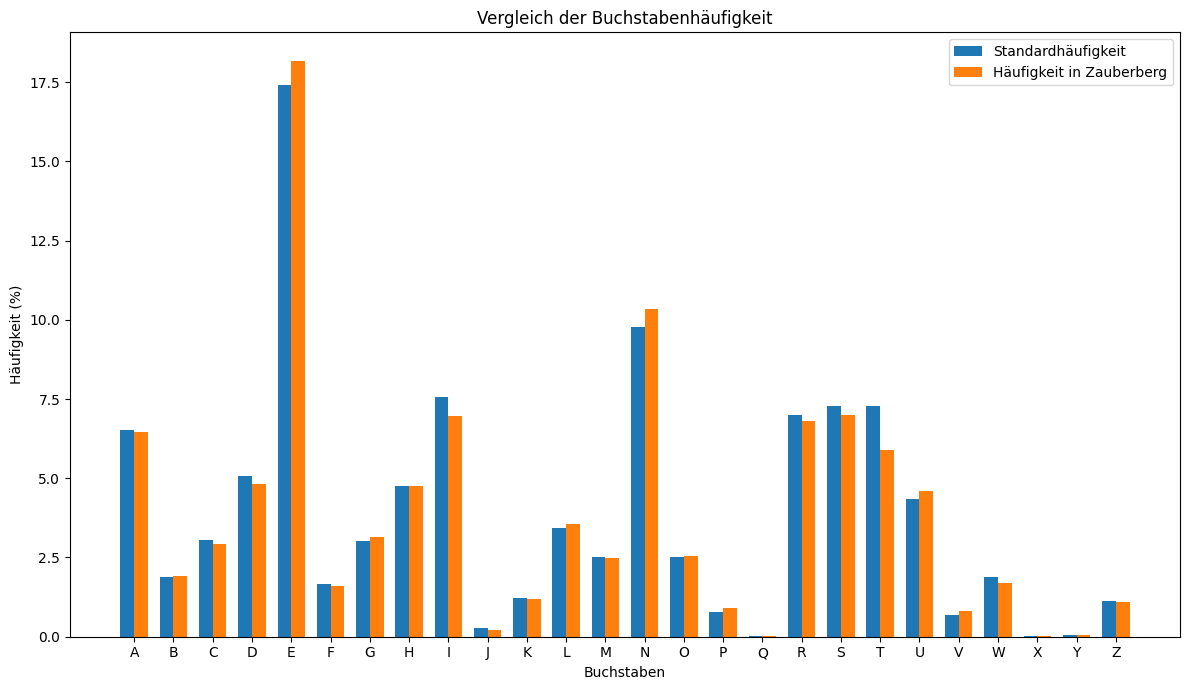

In [6]:
import pdfplumber
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
with pdfplumber.open("Mann_1989_Der Zauberberg - Roman.pdf") as pdf:
    pages = pdf.pages
    text = ""
    for i, pg in enumerate(pages):
        if i >= 23 and i < 42:
            text += pages[i].extract_text() + "\n"
def text_cleaning(text : str) -> str:
    clean = text.upper() \
                .replace('Ä', 'AE') \
                .replace('Ö', 'OE') \
                .replace('Ü', 'UE') \
                .replace('ß', 'SS') \
                .replace(' ', '') \

    cleaned_text = ''

    for c in clean:
        if c.isalpha():
            cleaned_text += c
    
    return cleaned_text

def file_writer(path : str, text : str) -> None:
    i = 0
    grouped_text = ""
    for c in text:
        i += 1
        if i % 50 == 0:
            grouped_text += c + "\n"
        elif i % 5 == 0:
            grouped_text += c + " "
        else:
            grouped_text += c
        
    with open(path, mode='w', encoding='utf-8') as f:
        f.write(grouped_text)
zauberberg = text_cleaning(text)
file_writer('zauberberg_bereinigt.txt', zauberberg)
def letter_frequency(text: str) -> dict:
    frequency = {}
    total_letters = 0
    
    for char in text:
        if char not in frequency:
            frequency[char] = 1
        else:
            frequency[char] += 1
        total_letters += 1
        
    for key, value in frequency.items():
        frequency[key] = (value / total_letters) * 100
        
           
    return frequency

frequency_zauberberg = letter_frequency(zauberberg)


standard_frequency = {
    'E': 17.4,
    'T': 7.27,
    'A': 6.51,
    'O': 2.51,
    'I': 7.55,
    'N': 9.78,
    'S': 7.27,
    'R': 7.0,
    'H': 4.76,
    'D': 5.08,
    'L': 3.44,
    'C': 3.06,
    'U': 4.35,
    'M': 2.53,
    'W': 1.89,
    'F': 1.66,
    'G': 3.01,
    'Y': 0.04,
    'P': 0.79,
    'B': 1.89,
    'V': 0.67,
    'K': 1.21,
    'J': 0.27,
    'X': 0.03,
    'Q': 0.02,
    'Z': 1.13
}


df = pd.DataFrame.from_dict([standard_frequency, frequency_zauberberg])
df.index = ['Standard Frequency', 'Zauberberg Frequency']
dft = df.T
dft = dft.sort_index()
dft['Standard Frequency'] = dft['Standard Frequency'].astype(float)
dft['Zauberberg Frequency'] = dft['Zauberberg Frequency'].astype(float)
# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standardhäufigkeit')
ax.bar(x + bar_width/2, dft['Zauberberg Frequency'], bar_width, label='Häufigkeit in Zauberberg')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Buchstaben')
ax.set_ylabel('Häufigkeit (%)')
ax.set_title('Vergleich der Buchstabenhäufigkeit')
ax.legend()
plt.tight_layout()

plt.show()

Die Grafik zeigt, dass bei einer Textlänge von 51’396 Buchstaben die
Verteilung in einem literarischen Text nahezu identisch ist mit der
allgemeinen Häufigkeitsverteilung in der deutschen Sprache. 

Die nächste Grafik zeigt, was mit der Verteilung der Buchstaben geschieht, wenn
der gleiche Text mit einer Caesar-Chiffre verschlüsselt worden ist.

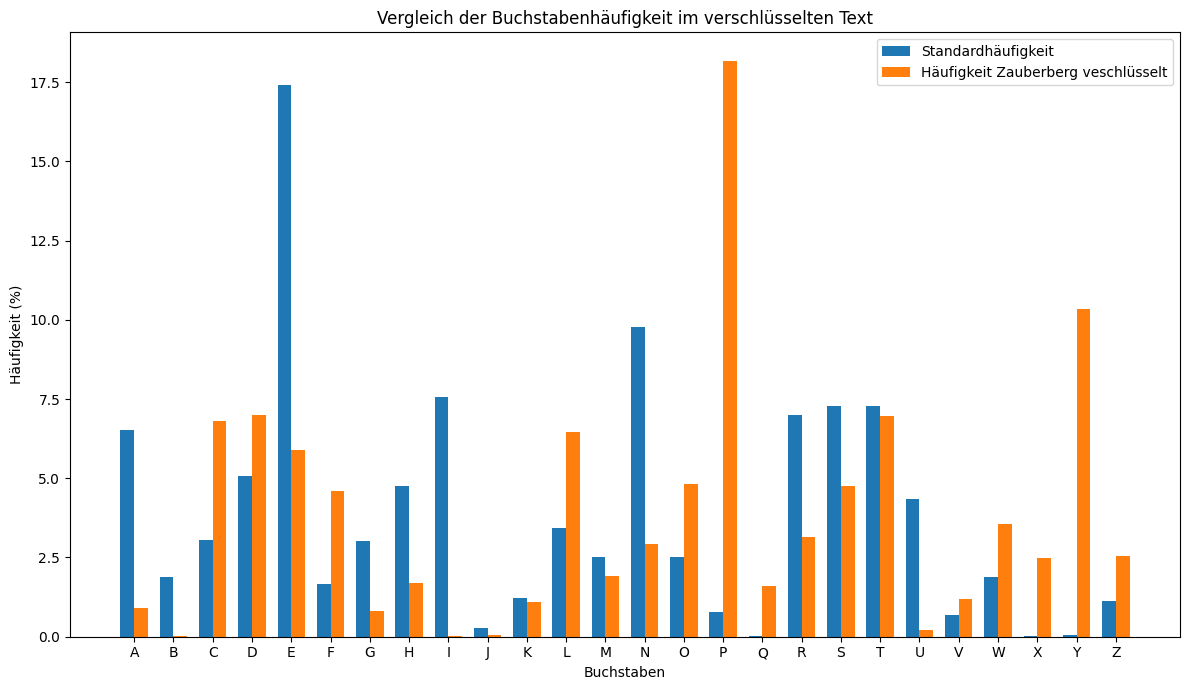

In [3]:
def caesar(text : str, shift : int, encrypt=True) -> str:
    text = text.upper()
    result = ""
    
    if encrypt:
        for char in text:
            shifted = (ord(char) - ord('A') + shift) % 26 + ord('A')
            result += chr(shifted)
    else:
        for char in text:
            shifted = (ord(char) - ord('A') - shift) % 26 + ord('A')
            result += chr(shifted)
            
    return result


zauberberg_verschluesselt = caesar(zauberberg, 11, encrypt=True)
frequency_zauberberg_verschluesselt = letter_frequency(zauberberg_verschluesselt)
dft['Zauberberg Frequency Encrypted'] = pd.Series(frequency_zauberberg_verschluesselt)

# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standardhäufigkeit')
ax.bar(x + bar_width/2, dft['Zauberberg Frequency Encrypted'], bar_width, label='Häufigkeit Zauberberg veschlüsselt')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Buchstaben')
ax.set_ylabel('Häufigkeit (%)')
ax.set_title('Vergleich der Buchstabenhäufigkeit im verschlüsselten Text')
ax.legend()
plt.tight_layout()

plt.show()

Es ist deutlich zu erkennen, dass die Verteilung dem gleichen Muster folgt -
verschoben um elf Positionen. Diese Auswertung ermöglicht die Entschlüsselung
des Textes, ohne alle möglichen Schlüsselalphabete durchzuprobieren.

## Vigenère Chiffre

Bei der Vigenère Chiffre handelt es sich um eine polyalphabetische Chiffre. Das
Verfahren ist nach Blaise de Vigenère (1523 - 1596) benannt. Polyalphabetisch
heisst, dass zur Verschlüsselung nicht eine Verschiebung vorgenommen wird,
sondern - nach jedem Buchstaben wechselnd - mehrere Verschiebungen
vorgenommen werden.

Um das zu erreichen, verwendet man ein sogenanntes Vigenère-Quadrat wie unten
abgebildet. 

![](vigenere_square_shading.svg)

Für die Verschlüsselung eines Klartextes braucht das Vigenère Verfahren ein
Schlüsselwort. Das Schlüsselwort sollte möglichst lang sein. Das folgende
Beispiel soll zeigen, wie das Vigenère Verfahren funktioniert. Der zu
verschlüsselnde Klartext lautet 'Kryptologie ist spannend' und der
Schlüssel
'Buelrain'. Als Hilfestellung werden Text und Schlüssel in einer Tabelle
dargestellt.

```
kryptologieistspannend
buelrainbuelrainbuelra
```

Der Schlüssel wird dabei ohne Wortabstand so oft wiederholt, bis die
Buchstabenfolge des Schlüssels gleich lang ist, wie die Buchstabenfolge, welche
zu verschlüsseln ist.  
Als nächstes wird der zu verschlüsselnde Buchstabe in der Kopfzeile des Vigenère
Quadrates gesucht. Damit wird die Spalte mit dem verschobenen Alphabet
identifiziert. Der chiffrierte Buchstabe ergibt sich, indem in der Spalte mit
den Zeilenköpfen der unter dem zu chiffrierenden Buchstaben befindliche
Buchstabe des Schlüssels gesucht wird. Der Schnittpunkt der Zeile mit der vorher
gefundenen Spalte entspricht dem chiffrierten Buchstaben.

```
kryptologieistspannend
buelrainbuelrainbuelra

LLCAKOTBHCITJTACBHRPED
```

Alternativ kann eine Verschlüsselung mit der Vigenère Chiffre auch mit modularer
Arithmetik umgesetzt werden. Dazu wird jedem Buchstaben ein Zahlenwert nach dem
Muster $a = 0, b = 1, ... , z = 25$ zugewiesen. Die Verschlüsselung erfolgt
anschliessend nach der 'Formel' $C_i = (P_i + K_i)\ mod\ 26$ Wobei die Buchstaben
$C$ für den chiffrierten Text, $P$ für den Klartext (Englisch *plain text*) und
$K$ für den Schlüssel (Englisch *key*) stehen. Der Index $_i$ steht für den
$i$-ten Buchstaben in der Textfolge.

Das obige Beispiel stellt sich dann folgendermassen dar:

```
 k  r  y  p  t  o  l  o  g  i  e  i  s  t  s  p  a  n  n  e  n  d
10 17 24 15 19 14 11 14 06 08 04 08 18 19 18 15 00 13 13 04 13 03
 b  u  e  l  r  a  i  n  b  u  e  l  r  a  i  n  b  u  e  l  r  a
01 20 04 11 17 00 08 13 01 20 04 11 17 00 08 13 01 20 04 11 17 00

11 37 28 26 36 14 19 27 07 28 08 19 35 19 26 28 01 33 17 15 30 03

11 11 02 00 10 14 19 01 07 02 08 19 09 19 00 02 01 07 17 15 04 03
 L  L  C  A  K  O  T  B  H  C  I  T  J  T  A  C  B  H  R  P  E  D
```

Für die Entschlüsselung wird die 'Formel' folgendermassen umgekehrt: 
$P_i = (C_i - K_i + 26)\ mod\ 26$. Die Addition von 26 in der Klammer erfolgt, um
negative Zahlen zu vermeiden.

Wie sich die Vigenère Verschlüsselung auf die Verteilung der Buchstaben
auswirkt, kann untenstehender Grafik entnommen werden.

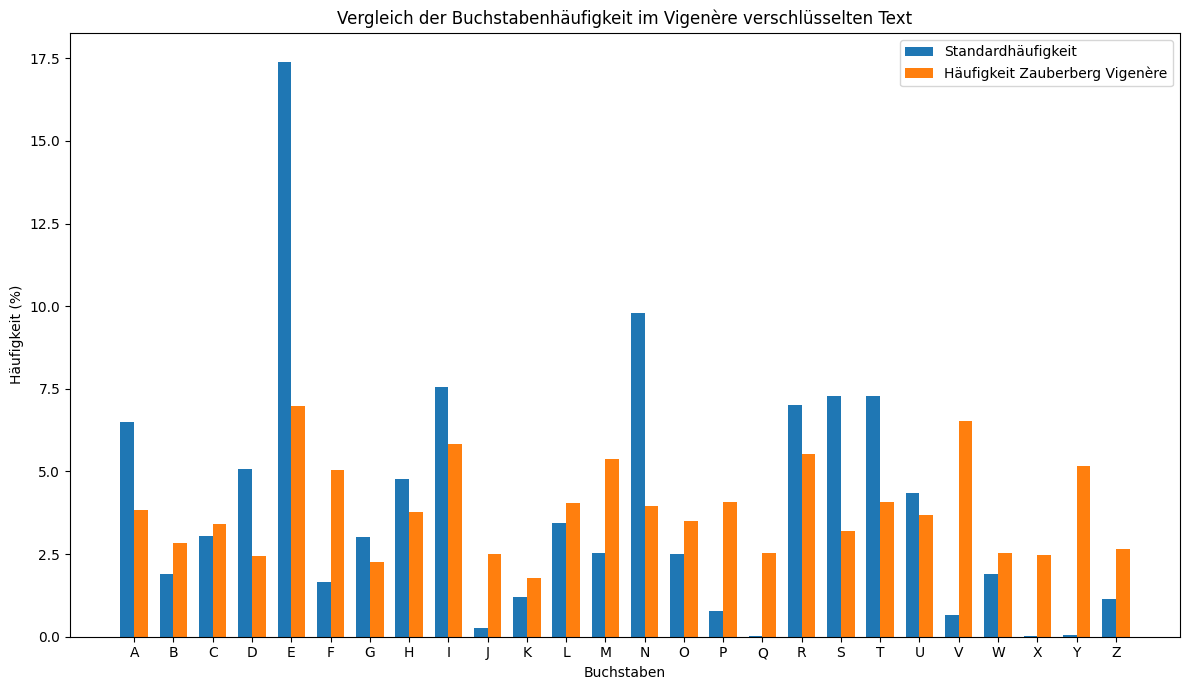

In [4]:
def vigenere_chiffre(text: str, key: str, encrypt=True) -> str:
    """
    Implementiert die Vigenère-Verschlüsselung für einen gegebenen Klartext und
    Schlüssel.
    
    Args:
        klartext (str): Der zu verschlüsselnde Text schluessel (str): Das
        Schlüsselwort für die Verschlüsselung
    
    Returns:
        str: Der verschlüsselte Text
    """
    
    # initialisiere den resultierenden Text
    resulting_text = ''
    
    # bestimme die Schlüssellänge für die anschliessende Modulo-Operation
    key_length = len(key)
    
    # itererie über den Eingabetext unter gleichzeitiger Erfassung des Index
    for i, char in enumerate(text):
        # berechne den Zahlwert des Buchstabens aus der ascii Tabelle
        char_no = ord(char) - 97
        key_no = ord(key[i % key_length]) - 97
        
        if encrypt == True:
            # berechne den Zahlwert des verschlüsselten Buchstabens
            ciph_no = (char_no + key_no) % 26
        else:
            # berechne den Zahlwert des entschlüsselten Buchstabens
            ciph_no = (char_no + (26 - key_no)) % 26
            
         # übernehme das Zeichen aufgrund seines Zahlwertes aus der ascii Tabelle  
        ciph = chr(ciph_no + 97)
        
        # füge den Buchstaben am resultierenden Text an
        resulting_text += ciph
    return resulting_text

zauberberg_vigenere = vigenere_chiffre(zauberberg.lower(), 'buelrain', encrypt=True)

zauberberg_vigenere_frequency = letter_frequency(zauberberg_vigenere.upper())
dft['Zauberberg Frequency Vigenere'] = pd.Series(zauberberg_vigenere_frequency)

# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standardhäufigkeit')
ax.bar(x + bar_width/2, dft['Zauberberg Frequency Vigenere'], bar_width, label='Häufigkeit Zauberberg Vigenère')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Buchstaben')
ax.set_ylabel('Häufigkeit (%)')
ax.set_title('Vergleich der Buchstabenhäufigkeit im Vigenère verschlüsselten Text')
ax.legend()
plt.tight_layout()

plt.show()

Wie unschwer zu erkennen ist, stellt sich die Verteilung der Buchstaben in einem
polyalphabetisch verschlüsselten Text deutlich anders dar, als dies in normalen
Text der Fall ist. Die Vigenère Chiffre galt daher während ungefähr 300 Jahren
als 'la chiffre indéchiffrable'.

Ein Spezialfall der Vigenère-Chiffre lässt sich tatsächlich nicht
entschlüsseln. Das 
ist dann der Fall, wenn der Schlüssel länger ist als der Klartext.
Man spricht in diesem Fall vom One-Time Pad.